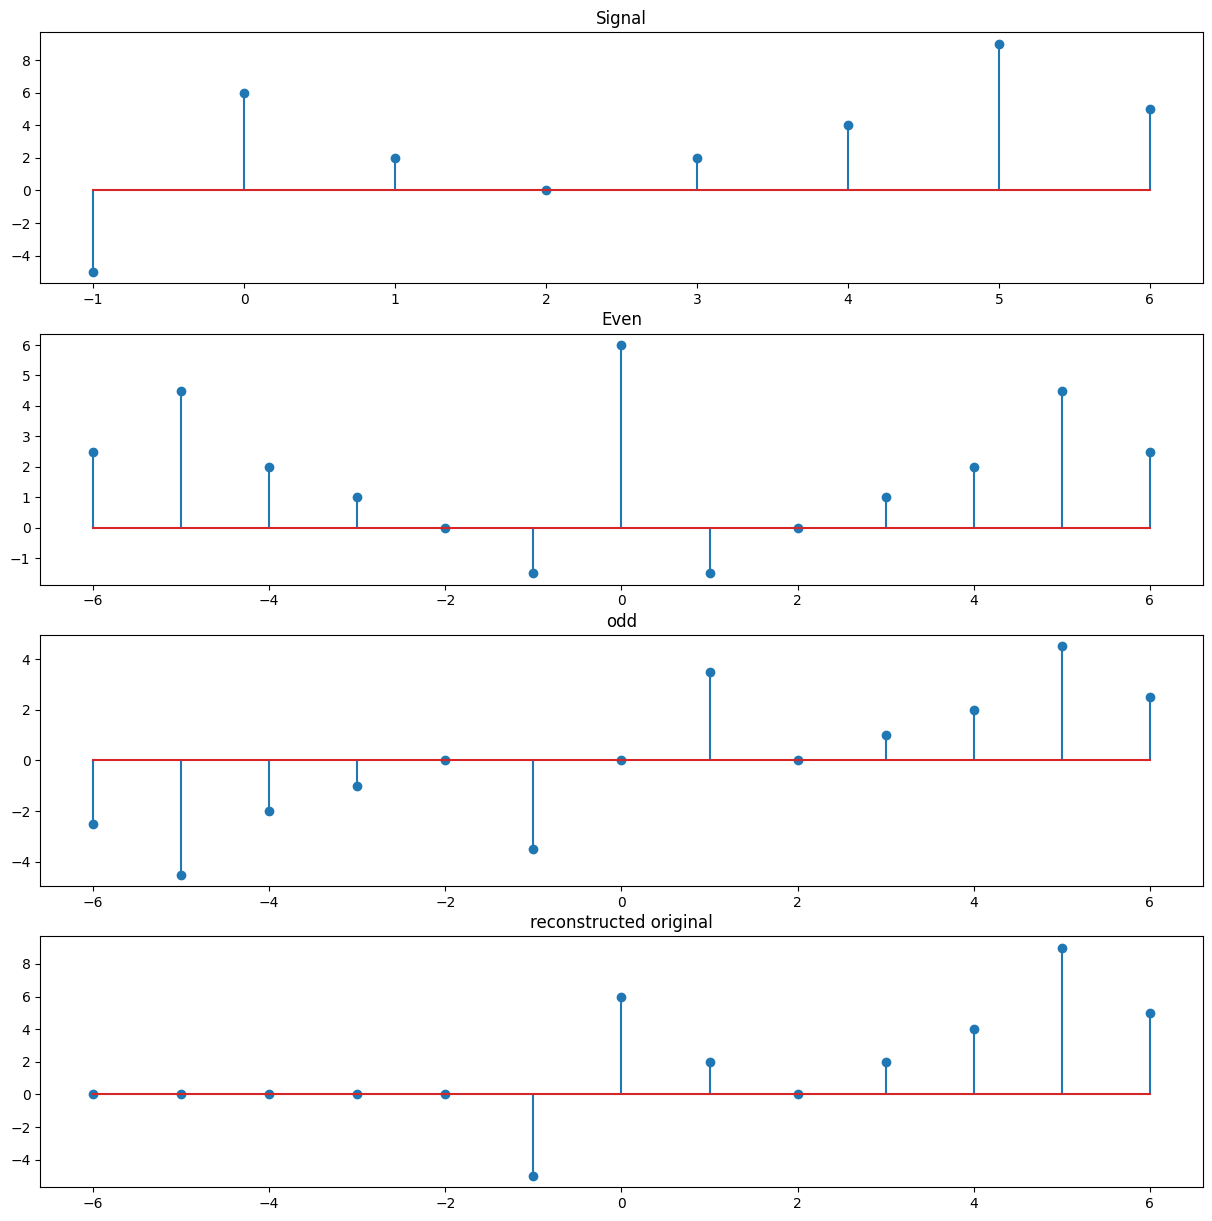

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def signal_add(x1,n1,x2,n2):
    n = np.arange(min(min(n1),min(n2)),max(max(n1),max(n2))+1)
    sample_size = len(n)
    y1 = np.zeros(sample_size)
    y2 = np.zeros(sample_size)
    
    # y1[(n>=min(n1))&(n<=max(n1))] = x1
    # y2[(n>=min(n2))&(n<=max(n2))] = x2
    
    for i, ni in enumerate(n1):
        y1[n == ni] = x1[i]
    for i, ni in enumerate(n2):
        y2[n == ni] = x2[i]
    
    y = y1 + y2
    
    return y,n

def signal_sub(x1,n1,x2,n2):
    n = np.arange(min(min(n1),min(n2)),max(max(n1),max(n2))+1)
    sample_size = len(n)
    y1 = np.zeros(sample_size)
    y2 = np.zeros(sample_size)
    
    # y1[(n>=min(n1))&(n<=max(n1))] = x1
    # y2[(n>=min(n2))&(n<=max(n2))] = x2
    for i, ni in enumerate(n1):
        y1[n == ni] = x1[i]
    for i, ni in enumerate(n2):
        y2[n == ni] = x2[i]
    
    y = y1 - y2
    
    return y,n

def fold(x,n):
    y = np.flip(x)
    n = -np.flip(n)
    return y,n

def shift(x,n,k):
    y = np.copy(x)
    n = n + k
    return y,n

def even_odd(x1,n1):
    x1_fold,n1_fold = fold(x1,n1)

    y_even, n_even = signal_add(x1,n1,x1_fold,n1_fold)
    y_odd, n_odd = signal_sub(x1,n1,x1_fold,n1_fold)

    y_even = 0.5* y_even
    y_odd = 0.5* y_odd
    
    return y_even, n_even, y_odd, n_odd    
    

x1=np.array([-5, 6, 2, 0, 2, 4, 9, 5])
n1=np.arange(-1,6+1)

y_even, n_even, y_odd, n_odd = even_odd(x1,n1)

y_reconstruct, n_reconstruct = signal_add(y_even,n_even,y_odd,n_odd)

plt.figure(figsize=(15,15))
plt.subplot(4,1,1)
plt.title("Signal")
plt.stem(n1,x1)
plt.subplot(4,1,2)
plt.title("Even")
plt.stem(n_even,y_even)
plt.subplot(4,1,3)
plt.title("odd")
plt.stem(n_odd,y_odd)
plt.subplot(4,1,4)
plt.title("reconstructed original")
plt.stem(n_reconstruct,y_reconstruct)


plt.show()